In [1]:
import copy
import time
import random
import math
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def dist(x1,y1,x2,y2):
  a = (x1-x2)**2
  b = (y1-y2)**2
  return (a+b)**(0.5)

In [10]:
ele1 = open("graph1_17.txt", "r")
ele2 = open("graph2_24.txt", "r")
ele3 = open("graph3_42.txt", "r")
ele4 = open("graph4_58.txt", "r")
ele5 = open("graph5_120.txt", "r")
ele6 = open("eil22.txt", "r")
ele8 = open("rat99.txt", "r")

In [11]:
def convert(ele, l):
    main = []
    for i in ele:
        a = list(map(float, i.split()))
        main.append(a)
    
    for i in range(len(main)):
        main[i][0] = main[i][0] - 1
        
    graph = [[0 for i in range(l)] for j in range(l)]
    for i in range(l):
          for j in range(l):
                graph[i][j] = (dist(main[i][1], main[i][2], main[j][1], main[j][2]))
    return(main, graph)

In [12]:
main6, graph6 = convert(ele6, 22)
main8, graph8 = convert(ele8, 99)

In [13]:
# Converting the Read File into a List
for x in ele1:
  a = x
  element1 = list(map(int, a.split()))

for x in ele2:
  a = x
  element2 = list(map(int, a.split()))

for x in ele3:
  a = x
  element3 = list(map(int, a.split()))

for x in ele4:
  a = x
  element4 = list(map(int, a.split()))

for x in ele5:
  a = x
  element5 = list(map(int, a.split()))

In [14]:
# Lower Diagonal Row to Matrix Format
def lower_diag_row(main, l):
  graph = [[0 for i in range(l)] for i in range(l)]
  count = 0
  for i in range(l):
    for j in range(0, i+1):
      graph[i][j] = main[count]
      graph[j][i] = main[count]
      count = count + 1
  return graph

In [15]:
# Upper Diagonal to Matrix Format
def upper_diag(main, l):
  graph = [[0 for i in range(l)] for i in range(l)]
  count = 0
  index = 0
  for i in range(l-1):
    count = count+1
    for j in range(count, l):
      graph[i][j] = main[index]
      graph[j][i] = main[index]
      index = index + 1
  return graph

In [16]:
# 5 Standard Graphs
graph1 = lower_diag_row(element1, 17) # Best - 2085
graph2 = lower_diag_row(element2, 24) # Best - 1272
graph3 = lower_diag_row(element3, 42) # Best - 699
graph4 = upper_diag(element4, 58) # Best - 25395
graph5 = lower_diag_row(element5, 120) # Best - 6942
max_node = 99999

In [17]:
# To calculate the cost of a given path in a graph
def path_to_cost(path, graph):
  l = len(path)
  cost = 0
  start = path[0]
  for i in range(1,l):
    cost = cost + graph[start][path[i]]
    start = path[i]
  
  cost = cost + graph[path[l-1]][path[0]]
  return cost

In [18]:
# Nearest Neighbour Approach
def nearest_neighbour(graph):
  nodes = len(graph[0])
  cost_nn = 0
  path_nn = [0]
  i = 0
  while(len(path_nn) < nodes):
    min_val = max_node+1
    min_node = 0
    for j in range(nodes):
      if(i!=j):
        if((j not in path_nn) and graph[i][j] < min_val):
          min_val = graph[i][j]
          min_node = j
  
    cost_nn = cost_nn + min_val
    path_nn.append(min_node)
    i = min_node

  cost_nn = cost_nn + graph[path_nn[-1]][path_nn[0]]
  return path_nn

In [19]:
# To find the parent of an elements
def find(parent, i):
    if parent[i] == i:
        return i
    return find(parent, parent[i])

In [20]:
# Union of two elements
def union(parent, rank, x, y):
      xroot = find(parent, x)
      yroot = find(parent, y)

      if rank[xroot] < rank[yroot]:
          parent[xroot] = yroot
      elif rank[xroot] > rank[yroot]:
          parent[yroot] = xroot
      else:
          parent[yroot] = xroot
          rank[xroot] += 1

In [21]:
# Determination of Degree of a Node
def degree(result, i):
    count = 0
    for j in result:
      if(j[0] == i):
        count = count +1
      if(j[1] == i):
        count = count +1
    return count

In [22]:
# Greedily Selects the Graph Solution
def greedy_selection(graph_ns):
      n = len(graph_ns)
      parent = []
      rank = []

      for i in range(n):
          parent.append(i)
          rank.append(0)

      result = []
      i = 0
      e = 0

      edges = []
      for u in range(n):
          for v in range(u, n):
              if graph_ns[u][v] != 0:
                  edges.append([u, v, graph_ns[u][v]])

      edges = sorted(edges, key=lambda item: item[2])

      while e < n - 1:
          u, v, w = edges[i]
          i = i + 1
          x = find(parent, u)
          y = find(parent, v)

          check = 0 
          if x != y:
            check = check + 1
        
          if ((degree(result, u) < 2) and (degree(result, v) < 2)):
            check = check + 1
        
          if (check == 2):
            e = e + 1
            result.append([u, v, w])
            union(parent, rank, x, y)

      return result

In [23]:
# Converts the edges selected into a Graph
def edge_to_graph(greed):
    l = len(greed) + 1
    new_graph = [[0 for i in range(l)] for i in range(l)]
    for j in greed:
      new_graph[j[0]-1][j[1]-1] =  new_graph[j[1]-1][j[0]-1] = j[2]
    return new_graph

In [24]:
# Returns the Greedy Path
def greedy_algorithm(graph):

# Finding out the end nodes
  graph_no_start = copy.deepcopy(graph)
  del graph_no_start[0]
  for i in graph_no_start:
    del i[0]

  greed = greedy_selection(graph_no_start)
  for i in greed:
    i[0] = i[0]+1
    i[1] = i[1]+1

  end_nodes = []
  for i in range(len(graph[0])):
    if(degree(greed, i) == 1):
      end_nodes.append(i)

# Converting the Greedy Edges to Graph
  greedy_tree = edge_to_graph(greed)

# Graph to Path
  path_ga = []
  path_ga.append(end_nodes[0])
  while(len(path_ga) < len(graph[0])-1):
    curr = path_ga[-1] - 1
    for i in range(len(greedy_tree[curr])):
      if (greedy_tree[curr][i] != 0):
        if((i+1) not in path_ga):
          path_ga.append(i+1)
  path_ga.insert(0,0)

  return path_ga

In [25]:
# Two Opt
def two_opt(path, graph):

  nodes = len(path)
  swap_list = []
  for i in range(1, nodes):
    for j in range(i+1, nodes):
      swap_list.append([i,j])
  
  swap_random = copy.deepcopy(swap_list)
  random.shuffle(swap_random)

  duration = 20 # Time for which to keep swapping
  j = 0
  counter = 0
  check1 = copy.deepcopy(path)
  check2 = copy.deepcopy(path)
  start_time = time.time() 
  
  while (time.time() - start_time) < duration:
    random.shuffle(swap_random)
    lm = 0
    for i in swap_random:
      temp = check1[i[0]] 
      check1[i[0]] = check1[i[1]]
      check1[i[1]] = temp
      lm = lm + 1
      counter = counter +1

      if (path_to_cost(check1, graph) < path_to_cost(check2, graph)):
        check2 = copy.deepcopy(check1)
      
        # print(f"Swap Count {j+1}, between the nodes {check1[i[1]]} and {check1[i[0]]}")
        j = j+1
        break
      
      else:
        temp = check1[i[0]] 
        check1[i[0]] = check1[i[1]]
        check1[i[1]] = temp
      
    if(lm==len(swap_list)):
      # print("\nLocal Minima Reached")
      break # Breaks when a local minima is reached
  

  # print(f"\n---------Number of Iterations = {counter}-----------\n")  
  # print(f"---------Number of Swaps = {j}-----------\n") 
  return(check2)

In [26]:
# Cost Functions
def cost_nn(graph):
  path_nn = nearest_neighbour(graph)
  return(path_to_cost(path_nn, graph))

def cost_ga(graph):
  path_ga = greedy_algorithm(graph)
  return(path_to_cost(path_ga, graph))

def cost_2opt(path, graph):
  path_new = two_opt(path,graph)
  return(path_to_cost(path_new, graph))

In [27]:
optimised = {"graph1":2085,"graph2":1272,"graph3":699,"graph4":25395,"graph5":6942, "graph6": 283, "graph7":7542, "graph8":1211}

In [28]:
def stats(graph):

  greedy = cost_ga(graph)
  near = cost_nn(graph)
  path_ga = greedy_algorithm(graph)
  path_nn = nearest_neighbour(graph)

  two_greedy = []
  for i in range(30):
    temp = cost_2opt(path_ga, graph)
    two_greedy.append(temp)
    
  two_near = []
  for i in range(30):
    temp = cost_2opt(path_nn, graph)
    two_near.append(temp)
  
  random_path = copy.deepcopy(path_ga)
  random.shuffle(random_path)

  two = []
  m = cost_2opt(random_path, graph)
  for i in range(100):
    random.shuffle(random_path)
    path_ret = two_opt(random_path, graph)
    temp = path_to_cost(path_ret, graph)
    if (temp<m):
      m = temp
      final = copy.deepcopy(path_ret)
    two.append(temp)

  print(f"Greedy Algorithm:              {greedy}")
  print(f"Nearest Neighbour:             {near}")
  print(f"2 opt with Greedy:             {max(two_greedy), (sum(two_greedy)/len(two_greedy)), min(two_greedy)}")
  print(f"2 opt with Nearest Neighbour:  {max(two_near), (sum(two_near)/len(two_near)), min(two_near)}")
  print(f"2 opt:                         {max(two), (sum(two)/len(two)), min(two)}")

  # return(final)

In [29]:
import copy
import random
import pandas as pd

def stats(graphs):
    table = []
    row_names = []
    
    for i, graph in enumerate(graphs, start=1):
        greedy = cost_ga(graph)
        near = cost_nn(graph)
        path_ga = greedy_algorithm(graph)
        path_nn = nearest_neighbour(graph)

        two_greedy = []
        for k in range(30):
            temp = cost_2opt(path_ga, graph)
            two_greedy.append(temp)

        two_near = []
        for ik in range(30):
            temp = cost_2opt(path_nn, graph)
            two_near.append(temp)

        random_path = copy.deepcopy(path_ga)
        random.shuffle(random_path)

        two = []
        m = cost_2opt(random_path, graph)
        for j in range(10):
            random.shuffle(random_path)
            path_ret = two_opt(random_path, graph)
            temp = path_to_cost(path_ret, graph)
            if temp < m:
                m = temp
                final = copy.deepcopy(path_ret)
            two.append(temp)

        table.append([greedy, near, min(two_greedy), min(two_near), min(two)])
        row_names.append(f'Graph{i}')

    column_names = ['Greedy Algorithm', 'Nearest Neighbour', '2 opt with Greedy', '2 opt with Nearest Neighbour', '2 opt']
    df = pd.DataFrame(table, columns=column_names, index=row_names)

    
    return df

In [69]:
# graphs = [graph1, graph2, graph3, graph4, graph5, graph6, graph7, graph8]  
# result_table = stats(graphs)
# result_table

,Greedy Algorithm,Nearest Neighbour,2 opt with Greedy,2 opt with Nearest Neighbour,2 opt
Graph1,2351.000000,2187.000000,2253.000000,2085.000000,2103.000000
Graph2,1639.000000,1553.000000,1376.000000,1475.000000,1425.000000
Graph3,1005.000000,956.000000,935.000000,856.000000,912.000000
Graph4,34491.000000,30774.000000,33367.000000,28593.000000,32951.000000
Graph5,8830.000000,9351.000000,8549.000000,8698.000000,11783.000000
Graph6,315.726851,312.088870,315.726851,300.854576,324.257709
Graph7,10108.395041,8980.918279,9293.399679,8667.835555,9875.300328
Graph8,1580.181675,1564.724855,1543.606889,1394.103139,1847.312182


### Simulated Annealing

In [74]:
# Simulated Annealing
def simulated_annealing(path, graph, temp, neigh, change):

  nodes = len(path)
  swap_list = []
  for i in range(1, nodes):
    for j in range(i+1, nodes):
      swap_list.append([i,j])
  
  swap_random = copy.deepcopy(swap_list)
  random.shuffle(swap_random)

  j = 0
  counter = 0
  check1 = copy.deepcopy(path)
  check2 = copy.deepcopy(path)
  start_time = time.time() 
  
  while (True):
    random.shuffle(swap_random)
    lm = 0

    for i in swap_random:
      tmp = check1[i[0]] 
      check1[i[0]] = check1[i[1]]
      check1[i[1]] = tmp
      lm = lm + 1
      counter = counter +1

      cost = path_to_cost(check1, graph) - path_to_cost(check2, graph)

      if(counter%neigh == 0):
        temp = temp*change

      if (cost<0):
        check2 = copy.deepcopy(check1)
        # print(f"Positive Swap Count {j+1}, between the nodes {check1[i[1]]} and {check1[i[0]]}")
        j = j+1
      
      if(cost>0):
        if(math.exp((-1*(cost))/temp) > random.random()):
          # print(f"Negative Swap Count {j+1}, between the nodes {check1[i[1]]} and {check1[i[0]]}")
          check2 = copy.deepcopy(check1)
          lm = 0
          j = j+1

      else:
        tmp = check1[i[0]] 
        check1[i[0]] = check1[i[1]]
        check1[i[1]] = tmp
    
    if(temp<0.0025):
        break
    
    # if(lm==len(swap_list)):
    #   print("\nLocal Minima Reached")
    #   break 
  
  final = two_opt(check2, graph)
  # print("Final Temp: ",temp)
  return(final)

In [37]:
def neighbour_creation(path, swap_list):
    ret_list = []
    for i in range(20):
        check = copy.deepcopy(path)
        temp = check[swap_list[i][0]]
        check[swap_list[i][0]] = check[swap_list[i][1]]
        check[swap_list[i][1]] = temp
        ret_list.append(check)
    return ret_list

In [39]:
# Simulated Annealing
def simulated_annealing(path, graph, temp, neigh, change):
    
    nodes = len(path)
    swap_list = []
    for i in range(1, nodes):
        for j in range(i+1, nodes):
            swap_list.append([i,j])
    
    swap_random = copy.deepcopy(swap_list)
    random.shuffle(swap_random)

    j = 0
    counter = 0
    check1 = copy.deepcopy(path)
    check2 = copy.deepcopy(path)
  
    while (True):
        random.shuffle(swap_random)
        neighbour_list = neighbour_creation(check1, swap_random)
        cost_list = []
        for i in neighbour_list:
            cost_list.append(path_to_cost(i, graph))
        min_val = min(cost_list)
        min_index = cost_list.index(min_val)
        score = math.exp((-min_val)/temp)
                             
        if(score < 0.025):
             break 
        if(random.random()<score):
             check2 = copy.deepcopy(neighbour_list[min_index])
             check1 = copy.deepcopy(check2)
             temp = temp*change
             continue
        else:
             continue
                             
    final = two_opt(check2, graph)
    return(final)                

 P = exp(-(Ej-Ei)/T)
 Need to set 3 values:
 1. temp - Initial Temperature
 2. neigh - After how many iterations should we decrese the temperature
 3. change - Coefficient to decrease the temperature

In [40]:
costs = []
iter = []
swaps = []

def empirical(path, graph):
  nodes = len(path)
  swap_list = []
  for i in range(1, nodes):
    for j in range(i+1, nodes):
      swap_list.append([i,j])
  
  swap_random = copy.deepcopy(swap_list)
  random.shuffle(swap_random)

  duration = 20
  j = 0
  counter = 0
  check1 = copy.deepcopy(path)
  check2 = copy.deepcopy(path)
  start_time = time.time() 
  
  while (time.time() - start_time) < duration:
    random.shuffle(swap_random)
    lm = 0
    for i in swap_random:
      temp = check1[i[0]] 
      check1[i[0]] = check1[i[1]]
      check1[i[1]] = temp
      lm = lm + 1
      counter = counter +1

      cost = path_to_cost(check1, graph) - path_to_cost(check2, graph)
      costs.append(cost)

      if (cost<0):
        check2 = copy.deepcopy(check1)
        j = j+1
        break
      
      else:
        temp = check1[i[0]] 
        check1[i[0]] = check1[i[1]]
        check1[i[1]] = temp
    
    
    if(lm==len(swap_list)):
      break 
  iter.append(counter)
  swaps.append(j)
  return(check2)

In [41]:
graphs = [graph1, graph2, graph3, graph4, graph5, graph6, graph8]
init = []
for i in graphs:
  costs = []
  iter = []
  swaps = []

  mock = [j for j in range(len(i[0]))]
  random.shuffle(mock)
  for k in range(5):
    empirical(mock, i)
  avg_cost = sum(costs)/len(costs)
  l = [max(costs), (-avg_cost)/(math.log(0.8)), (max(costs)+((-avg_cost)/(math.log(0.8))))/2]
  init.append(l)

In [42]:
init

[[1602, 2077.212978793127, 1839.6064893965636],
 [1026, 1316.1866156935198, 1171.09330784676],
 [685, 808.4243426675763, 746.7121713337881],
 [21418, 24609.701176803468, 23013.850588401736],
 [4507, 5745.40899715403, 5126.204498577015],
 [254.67823685173244, 314.43750406484844, 284.55787045829044],
 [809.5349602101137, 1101.5051300860023, 955.520045148058]]

In [43]:
def table(graph, temp, start, end, gap, count):
  mock = [i for i in range(len(graph[0]))]
  nei = []
  while(start>=end):
    nei.append(start)
    start = start - gap
  
  col = ["Neighbours", 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6]
  rate = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6]
  df = pd.DataFrame(columns=col)
  

  for i in nei:
    row = []
    for j in rate:
      sa = []
      
      for k in range(count):
        x = simulated_annealing(mock, graph, temp, i, j)
    
        sa.append(round(path_to_cost(x, graph),2))
      
      row.append(min(sa))
    row.insert(0,i)
    df.loc[len(df.index)] = row
  

  fig = plt.figure(figsize = (8, .2))
  ax = fig.add_subplot(111)

  ax.table(cellText = df.values, rowLabels = df.index, 
         colLabels = df.columns, cellLoc='center')

  t = "Temp: " + str(temp) + "  Nodes: "+ str(len(graph[0]))
  ax.set_title(t)

  ax.axis('off')
  return (fig)

In [136]:
# table(graph1, init[0][0], 20,5,5,50)
# table(graph1, init[0][1], 20,5,5,50)
# table(graph1, init[0][2], 20,5,5,50)

In [137]:
# table(graph2, init[1][0], 20,5,5,50)
# table(graph2, init[1][1], 20,5,5,50)
# table(graph2, init[1][2], 20,5,5,50)

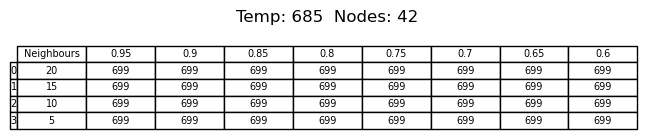

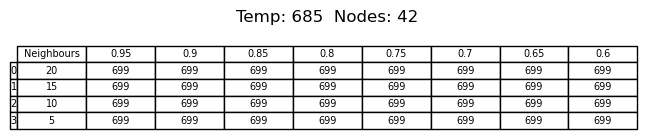

In [44]:
table(graph3, init[2][0], 20,5,5,30)
# table(graph3, init[2][1], 20,5,5,30)
# table(graph3, init[2][2], 20,5,5,30)

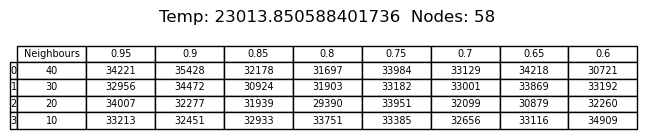

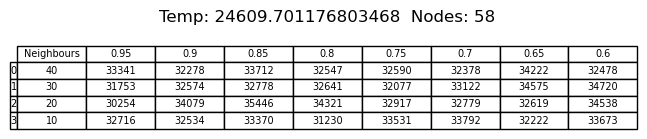

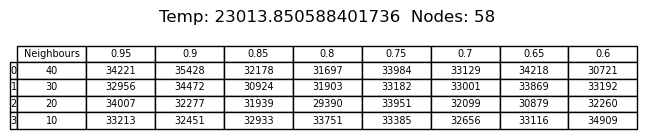

In [47]:
# table(graph4, init[3][0], 40,5,10,20)
table(graph4, init[3][1], 40,5,10,20)
table(graph4, init[3][2], 40,5,10,20)

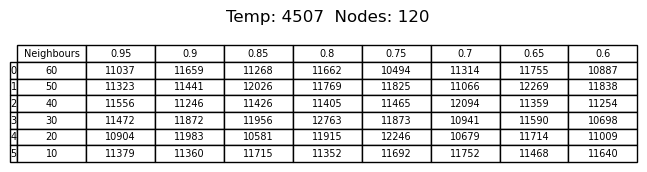

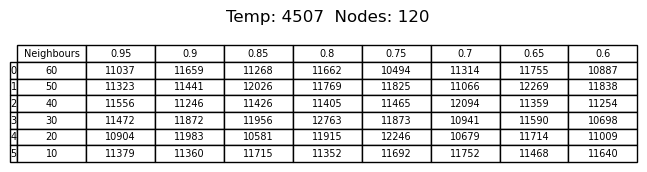

In [46]:
table(graph5, init[4][0], 60,5,10,10)
# table(graph5, init[4][1], 60,5,10,10)
# table(graph5, init[4][2], 60,5,10,10)

In [141]:
# table(graph6, init[5][0], 20,5,5,50)
# table(graph6, init[5][1], 20,5,5,50)
# table(graph6, init[5][2], 20,5,5,50)

In [142]:
# table(graph8, init[7][0], 20,5,5,5)
# table(graph8, init[7][1], 20,5,5,5)
# table(graph8, init[7][2], 20,5,5,5)

In [143]:
# optimised

In [175]:
def plott(path,x,y):
    path.append(path[0])
    plt.figure(figsize=(28, 20))
    plt.scatter(x, y)
    path_x = [x[i-1] for i in path]
    path_y = [y[i-1] for i in path]
    plt.plot(path_x, path_y, 'r-')  # Connect the points with a red line

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Euclidean Points with Path')

    plt.show()

In [178]:
n = int(input("Enter number of stops: "))
x = []
y = []
cities = {}
for i in range(n):
  a = input("Enter Stop-name, X-Coordinate, Y-Coordinate ")
  ele = list(map(str, a.split()))
  x.append(int(ele[1]))
  y.append(int(ele[2]))
  cities[i] = ele[0]

Enter number of stops: 7
Enter Stop-name, X-Coordinate, Y-Coordinate a 1 2
Enter Stop-name, X-Coordinate, Y-Coordinate b 3 4
Enter Stop-name, X-Coordinate, Y-Coordinate c 2 7
Enter Stop-name, X-Coordinate, Y-Coordinate d 1 100
Enter Stop-name, X-Coordinate, Y-Coordinate e 4 6
Enter Stop-name, X-Coordinate, Y-Coordinate f 2 7
Enter Stop-name, X-Coordinate, Y-Coordinate g 9 8


In [179]:
def con(x,y):
    l = len(x)
    graph = [[0 for i in range(l)] for j in range(l)]
    for i in range(l):
          for j in range(l):
                graph[i][j] = (dist(x[i], y[i], x[j], y[j]))
    return graph        

In [180]:
tour = con(x,y)
init = []

costs = []
iter = []
swaps = []
mock = [j for j in range(len(tour))]
random.shuffle(mock)
for k in range(50):
    empirical(mock, tour)
avg_cost = sum(costs)/len(costs)
l = [max(costs), (-avg_cost)/(math.log(0.8)), (max(costs)+((-avg_cost)/(math.log(0.8))))/2]
init.append(l)

In [181]:
mock = [i for i in range(len(tour))]
path = copy.deepcopy(mock)
for j in init[0]:
    for i in range(100):
        x = simulated_annealing(mock,tour,j,10,0.75)
        if(path_to_cost(x,tour)<path_to_cost(path,tour)):
            path = copy.deepcopy(x)

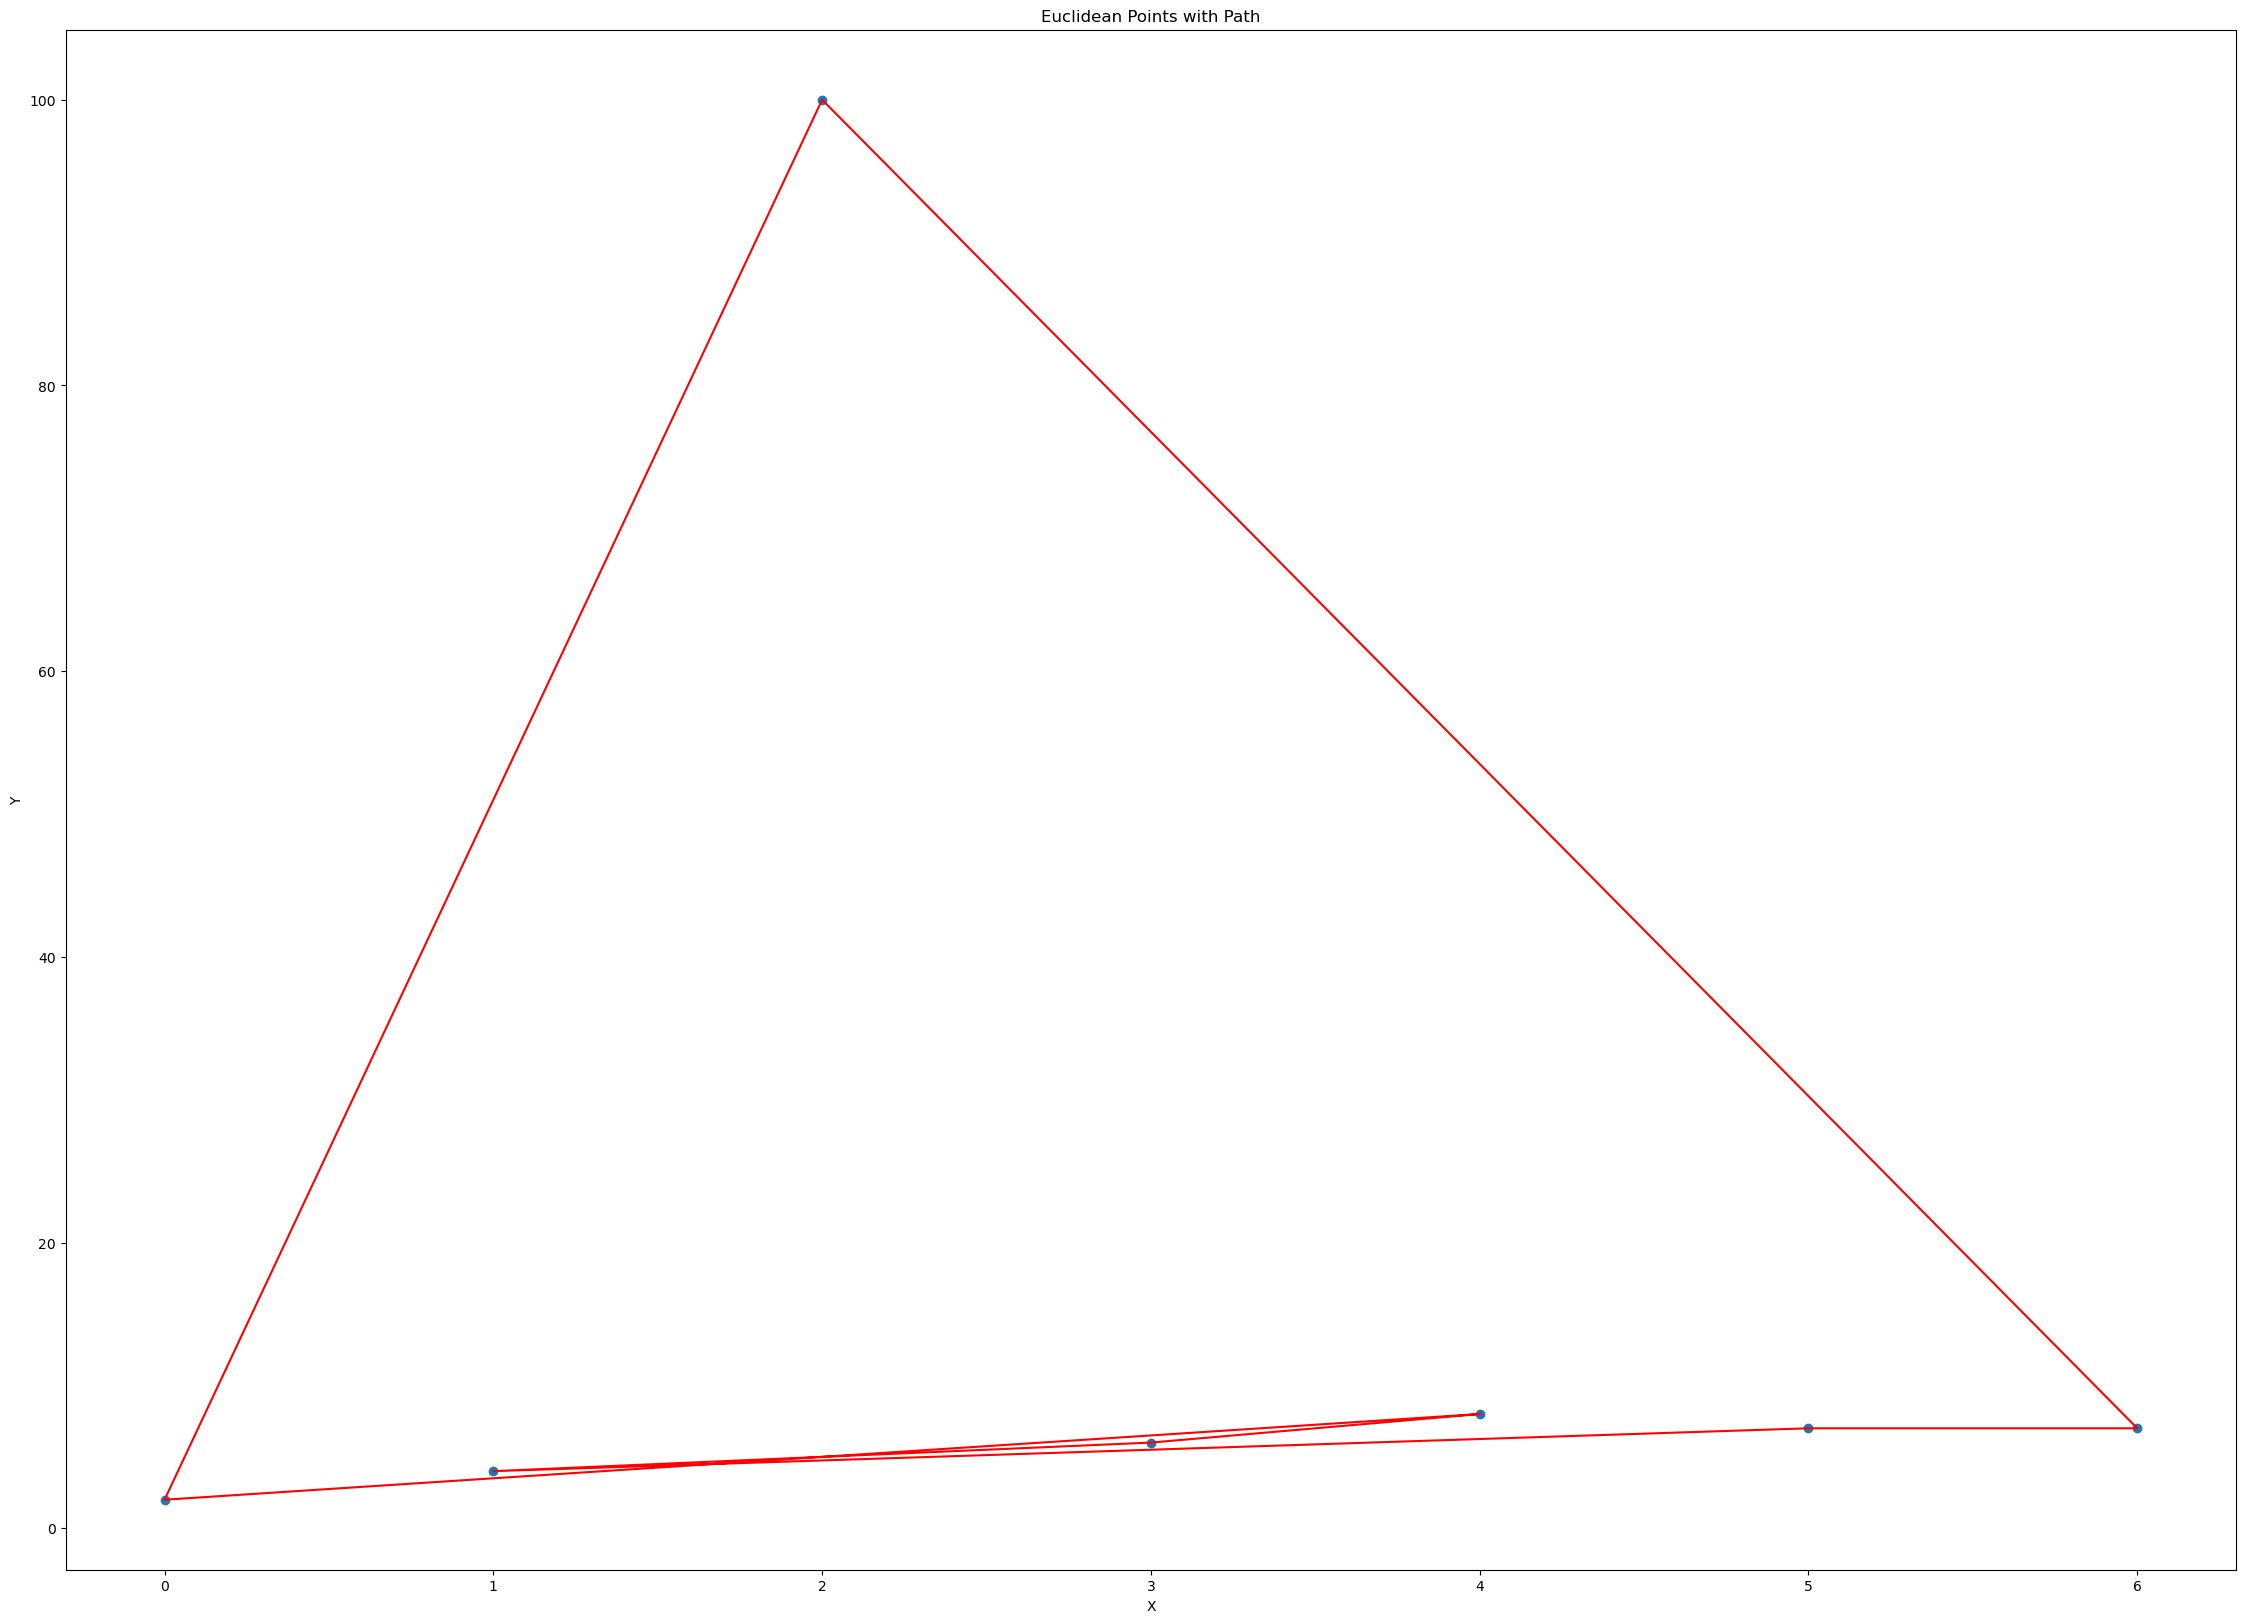

In [182]:
plott(path, x, y)